
## Nama : Rehana Putri Salsabilla
## NRP  : 5027221015
## Kelas : AI B

# 1. Memuat Dataset

In [ ]:
import warnings
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Mengabaikan peringatan
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# Memuat dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_features.csv')

In [ ]:
# Display data
display(df_train)

,income,num_toddlers,year_of_birth,education_level,marital_status,num_teens,num_days_since_last_shopping,study_expenses,food_expenses,transportation_expenses,entertainment_expenses,discount_activities,online_activities,offline_activities,complaints,enrollment_date,num_promotions
0,62396000.0,1.0,1983,Bachelor,Engaged,0.0,62.0,6069.0,66759.0,14161.0,12138.0,2.0,1.0,4.0,0.0,2012-08-20,0
1,54562979.0,1.0,1976,Bachelor,Engaged,0.0,50.0,12098.0,42404.0,NaN,3014.0,1.0,3.0,2.0,0.0,NaN,0
2,143602378.0,0.0,1975,Master,Married,0.0,29.0,27791.0,616969.0,148403.0,85496.0,3.0,9.0,12.0,0.0,NaN,1
3,105817777.0,1.0,1953,PhD,Single,1.0,53.0,3576.0,146764.0,14306.0,0.0,8.0,9.0,4.0,0.0,NaN,4
4,104646000.0,1.0,1958,NaN,Single,1.0,40.0,0.0,18207.0,0.0,0.0,3.0,1.0,4.0,0.0,2014-05-28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,78199470.0,0.0,1955,Master,Married,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3432,109306000.0,0.0,1947,PhD,Engaged,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3433,104621000.0,0.0,1974,Master,Married,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3434,110850000.0,1.0,1957,High School,Engaged,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0


In [ ]:
display(df_test)

,ID,income,num_toddlers,year_of_birth,education_level,marital_status,num_teens,num_days_since_last_shopping,study_expenses,food_expenses,transportation_expenses,entertainment_expenses,discount_activities,online_activities,offline_activities,complaints,enrollment_date
0,7392,NaN,0.0,1979,Bachelor,Engaged,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,6100,84063000.0,NaN,1950,Bachelor,Engaged,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,813,127532564.0,0.0,1966,Bachelor,Married,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,3128,165579620.0,0.0,1961,Master,Engaged,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,4655,117703159.0,1.0,1970,Bachelor,Engaged,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,271,143463000.0,0.0,1956,Bachelor,Married,1.0,67.0,157794.0,740418.0,103173.0,48552.0,2.0,9.0,6.0,0.0,2012-07-29
377,3334,128273000.0,0.0,1967,NaN,Married,1.0,28.0,0.0,214438.0,48552.0,22253.0,1.0,9.0,9.0,0.0,2013-07-31
378,3478,97176733.0,0.0,1956,Bachelor,Divorced,1.0,45.0,8486.0,179335.0,18394.0,34732.0,3.0,9.0,7.0,0.0,NaN
379,89,132507177.0,NaN,1955,Bachelor,Engaged,2.0,19.0,23578.0,225061.0,NaN,14865.0,3.0,5.0,11.0,0.0,NaN


# 2. Pemeriksaan Dataset

In [ ]:
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   income                        3270 non-null   float64
 1   num_toddlers                  3272 non-null   float64
 2   year_of_birth                 3436 non-null   int64  
 3   education_level               3260 non-null   object 
 4   marital_status                3245 non-null   object 
 5   num_teens                     3252 non-null   float64
 6   num_days_since_last_shopping  3281 non-null   float64
 7   study_expenses                3271 non-null   float64
 8   food_expenses                 3279 non-null   float64
 9   transportation_expenses       3262 non-null   float64
 10  entertainment_expenses        3240 non-null   float64
 11  discount_activities           3272 non-null   float64
 12  online_activities             3288 non-null   float64
 13  off

None

In [ ]:
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            381 non-null    int64  
 1   income                        357 non-null    float64
 2   num_toddlers                  355 non-null    float64
 3   year_of_birth                 381 non-null    int64  
 4   education_level               368 non-null    object 
 5   marital_status                360 non-null    object 
 6   num_teens                     361 non-null    float64
 7   num_days_since_last_shopping  364 non-null    float64
 8   study_expenses                365 non-null    float64
 9   food_expenses                 360 non-null    float64
 10  transportation_expenses       362 non-null    float64
 11  entertainment_expenses        363 non-null    float64
 12  discount_activities           367 non-null    float64
 13  onlin

None

In [ ]:
# Cek tipe data dari setiap kolom
print(df_train.dtypes)

income                          float64
num_toddlers                    float64
year_of_birth                     int64
education_level                  object
marital_status                   object
num_teens                       float64
num_days_since_last_shopping    float64
study_expenses                  float64
food_expenses                   float64
transportation_expenses         float64
entertainment_expenses          float64
discount_activities             float64
online_activities               float64
offline_activities              float64
complaints                      float64
enrollment_date                  object
num_promotions                    int64
dtype: object


In [ ]:
# Cek tipe data dari setiap kolom
print(df_test.dtypes)

ID                                int64
income                          float64
num_toddlers                    float64
year_of_birth                     int64
education_level                  object
marital_status                   object
num_teens                       float64
num_days_since_last_shopping    float64
study_expenses                  float64
food_expenses                   float64
transportation_expenses         float64
entertainment_expenses          float64
discount_activities             float64
online_activities               float64
offline_activities              float64
complaints                      float64
enrollment_date                  object
dtype: object


# 3. Pemeriksaan Kualitas Data

In [ ]:
# Pisahkan fitur dan label dari df_train
X_train = df_train.drop(columns=['num_promotions'])
y_train = df_train['num_promotions']

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk identifikasi missing values
def identify_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values[missing_values > 0]

# Menampilkan missing values pada train dan test data
print("Missing values in train data:")
print(identify_missing_values(X_train))

Missing values in train data:
income                           166
num_toddlers                     164
education_level                  176
marital_status                   191
num_teens                        184
num_days_since_last_shopping     155
study_expenses                   165
food_expenses                    157
transportation_expenses          174
entertainment_expenses           196
discount_activities              164
online_activities                148
offline_activities               157
complaints                       177
enrollment_date                 2477
dtype: int64


In [ ]:
print("Missing values in test data:")
print(identify_missing_values(df_test))

Missing values in test data:
income                           24
num_toddlers                     26
education_level                  13
marital_status                   21
num_teens                        20
num_days_since_last_shopping     17
study_expenses                   16
food_expenses                    21
transportation_expenses          19
entertainment_expenses           18
discount_activities              14
online_activities                17
offline_activities               12
complaints                       19
enrollment_date                 275
dtype: int64


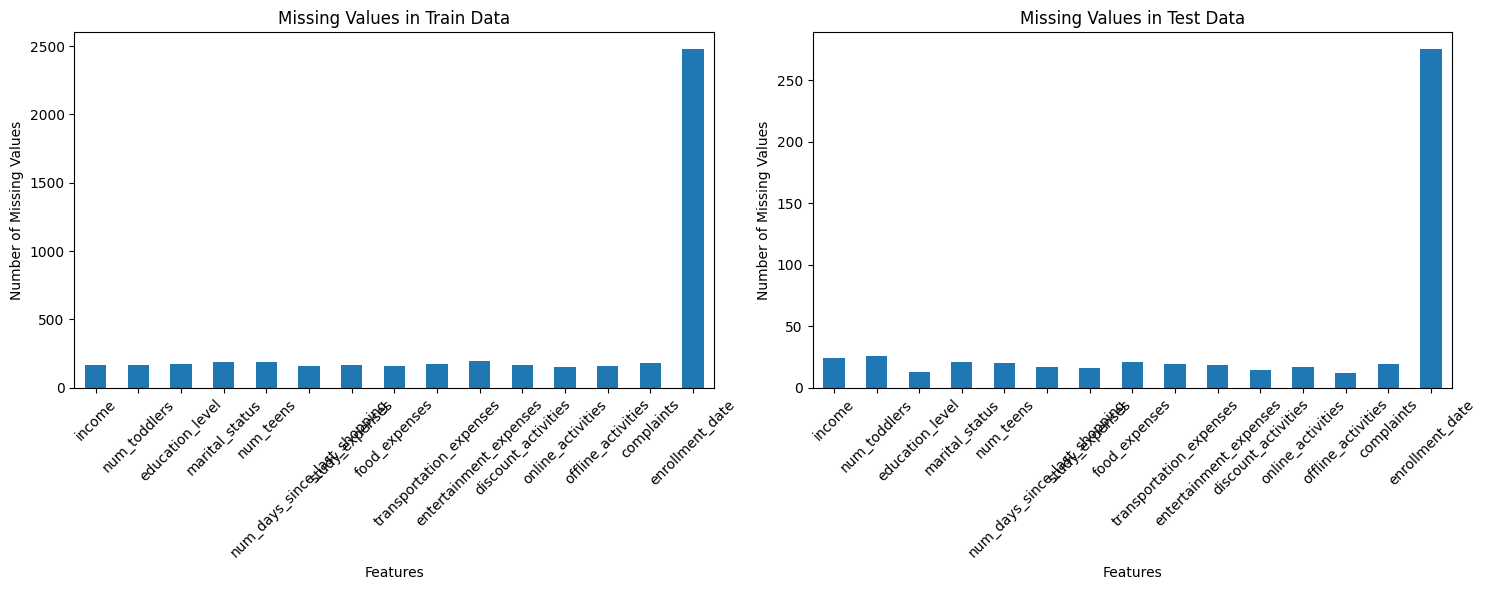

In [ ]:
# Visualisasi missing values dengan diagram batang
def plot_missing_values(df_train, df_test):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    missing_values_train = identify_missing_values(df_train)
    missing_values_train.plot(kind='bar', ax=axs[0])
    axs[0].set_title('Missing Values in Train Data')
    axs[0].set_xlabel('Features')
    axs[0].set_ylabel('Number of Missing Values')
    axs[0].tick_params(axis='x', rotation=45)

    missing_values_test = identify_missing_values(df_test)
    missing_values_test.plot(kind='bar', ax=axs[1])
    axs[1].set_title('Missing Values in Test Data')
    axs[1].set_xlabel('Features')
    axs[1].set_ylabel('Number of Missing Values')
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_missing_values(X_train, df_test)

In [ ]:
import pandas as pd

# Identifikasi kolom numerik dan kategorikal
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Handle missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='median')
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
df_test[numerical_cols] = numerical_imputer.transform(df_test[numerical_cols])

# Handle missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
df_test[categorical_cols] = categorical_imputer.transform(df_test[categorical_cols])

# Drop the enrollment_date column
X_train = X_train.drop(columns=['enrollment_date'])
df_test = df_test.drop(columns=['enrollment_date'])


In [ ]:
# Cek kolom numerik setelah handling missing values
numerical_cols_after = X_train.select_dtypes(include=['int64', 'float64']).columns

# Cek kolom kategorikal setelah handling missing values
categorical_cols_after = X_train.select_dtypes(include=['object']).columns

print("Numerical columns after handling missing values:")
display(numerical_cols_after)

print("\nCategorical columns after handling missing values:")
display(categorical_cols_after)


Numerical columns after handling missing values:


Index(['income', 'num_toddlers', 'year_of_birth', 'num_teens',
       'num_days_since_last_shopping', 'study_expenses', 'food_expenses',
       'transportation_expenses', 'entertainment_expenses',
       'discount_activities', 'online_activities', 'offline_activities',
       'complaints'],
      dtype='object')


Categorical columns after handling missing values:


Index(['education_level', 'marital_status'], dtype='object')

# 4. Identifikasi Outlier

In [ ]:
# Fungsi untuk identifikasi outlier menggunakan IQR
def identify_outliers_IQR(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    return outliers

# Identifikasi outlier menggunakan IQR untuk kolom numerik setelah handling missing values
outliers_after = identify_outliers_IQR(X_train, numerical_cols_after)


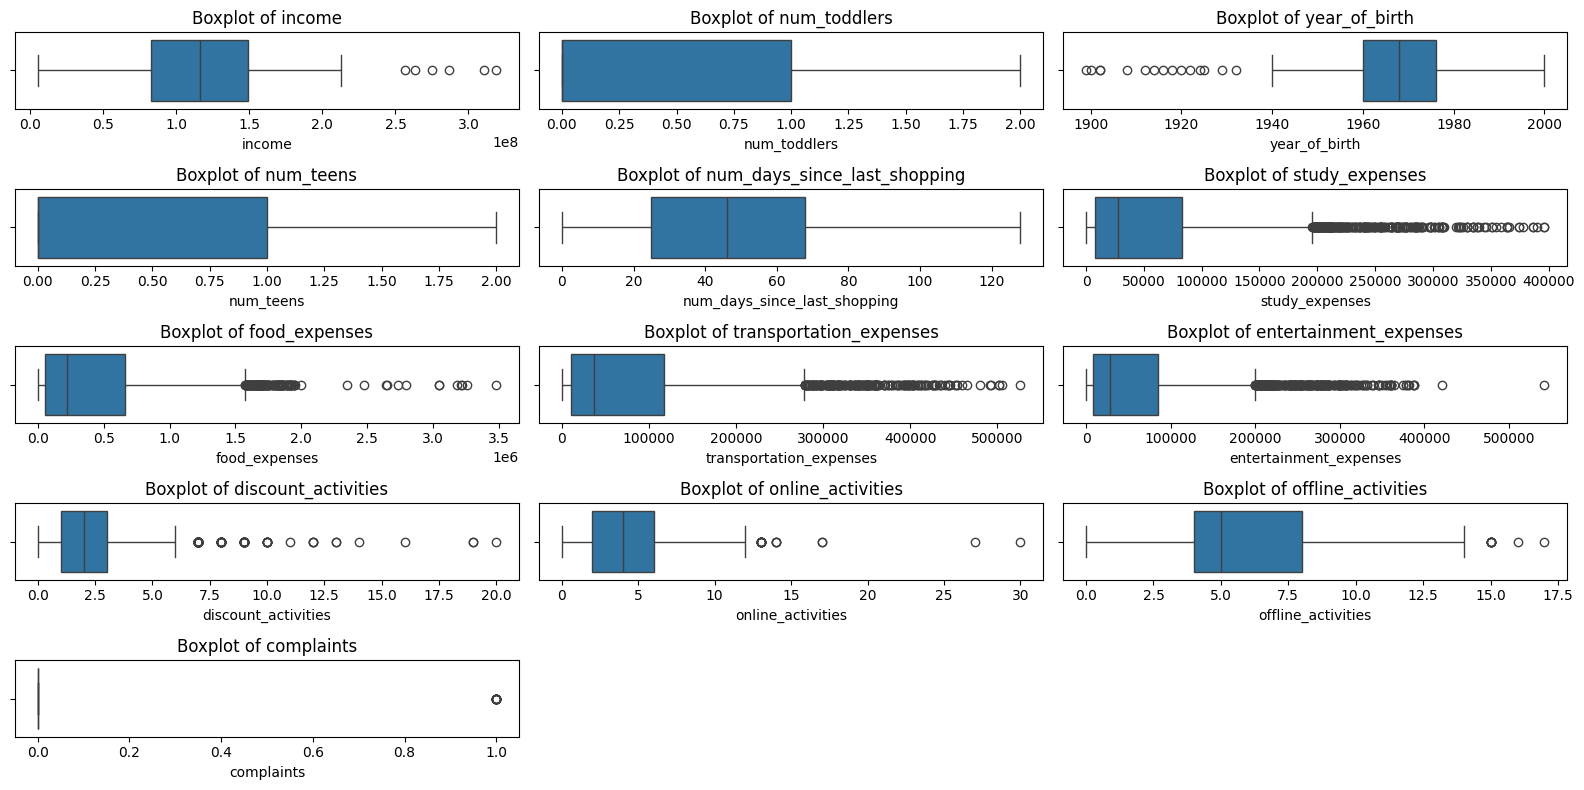

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_cols_after)
num_rows = (num_cols + 2) // 3  # Adjusting for the layout

# Plotting boxplot for each numerical column containing outliers
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols_after):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


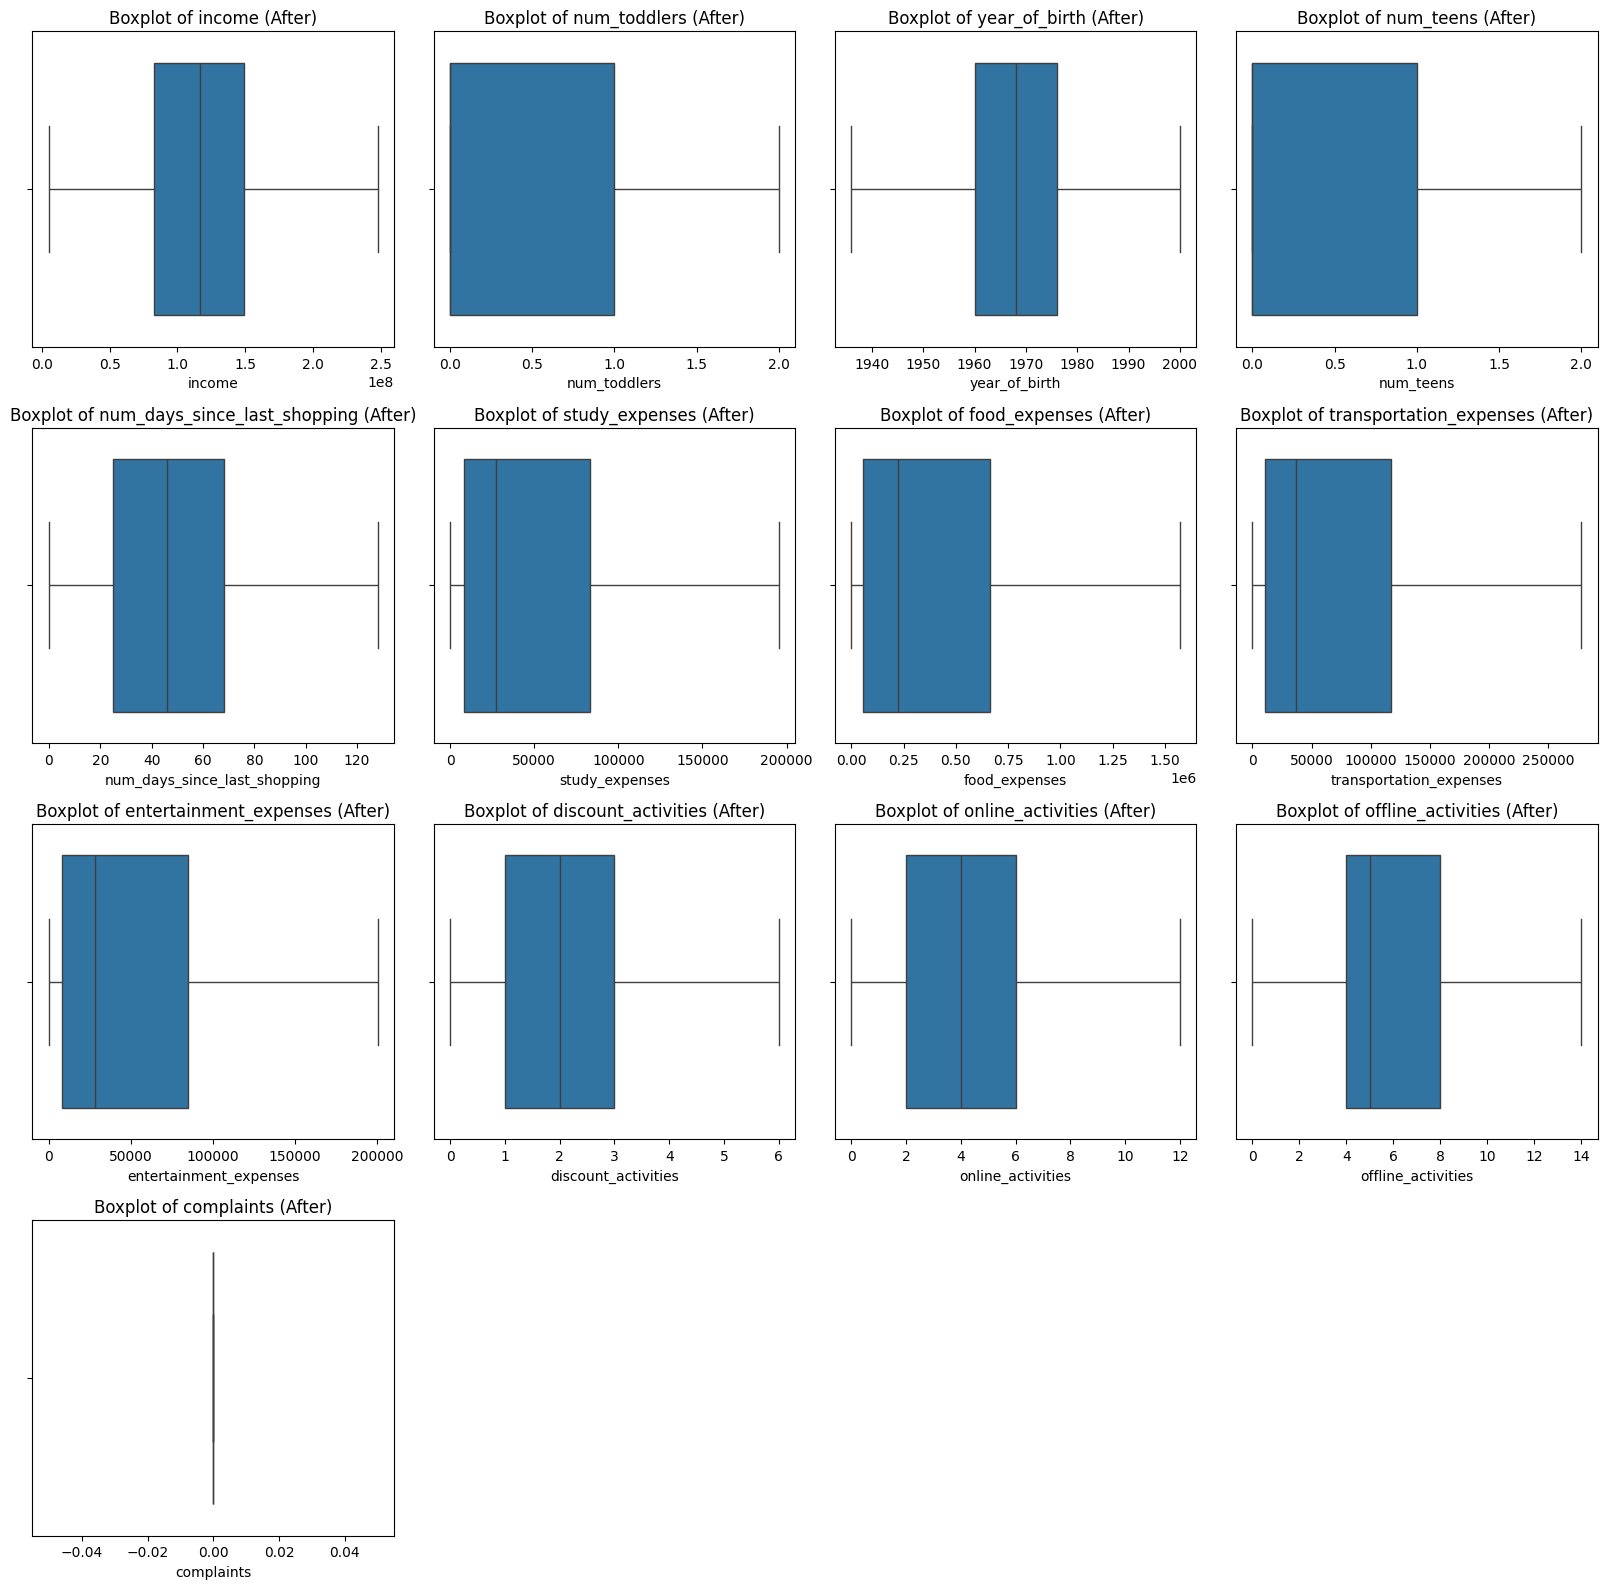

In [ ]:
# Handle outliers using IQR method
def handle_outliers_IQR(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df

# Handle outliers for numerical columns
X_train = handle_outliers_IQR(X_train, numerical_cols_after)

# Plot boxplot of numerical columns after handling outliers
plt.figure(figsize=(16, 16))
for i, col in enumerate(numerical_cols_after):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col} (After)')
plt.tight_layout()
plt.show()


# 5. Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom numerik dan kategorikal
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing untuk kolom kategorikal menggunakan LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    df_test[col] = label_encoder.transform(df_test[col])


# 6. Normalisasi

In [ ]:
# Define numerical transformer
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', 'passthrough', categorical_cols)  # kolom kategorikal telah diencoding sebelumnya
    ])

In [ ]:
# Membuat data frame baru dengan data yang sudah diproses
processed_df_train = pd.DataFrame(X_train, columns=numerical_cols.tolist() + categorical_cols.tolist())
processed_df_test = pd.DataFrame(df_test, columns=numerical_cols.tolist() + categorical_cols.tolist())

# Menambahkan kolom label kembali ke data train yang sudah diproses
processed_df_train['num_promotions'] = y_train.values

# Menampilkan lima baris pertama dari data frame baru untuk data train
print("Data Frame Train setelah proses preprocessing:")
display(processed_df_train.head())

# Menampilkan lima baris pertama dari data frame baru untuk data test
print("\nData Frame Test setelah proses preprocessing:")
display(processed_df_test.head())


Data Frame Train setelah proses preprocessing:


,income,num_toddlers,year_of_birth,num_teens,num_days_since_last_shopping,study_expenses,food_expenses,transportation_expenses,entertainment_expenses,discount_activities,online_activities,offline_activities,complaints,education_level,marital_status,num_promotions
0,62396000.0,1.0,1983.0,0.0,62.0,6069.0,66759.0,14161.0,12138.0,2.0,1.0,4.0,0.0,1,2,0
1,54562979.0,1.0,1976.0,0.0,50.0,12098.0,42404.0,36533.5,3014.0,1.0,3.0,2.0,0.0,1,2,0
2,143602378.0,0.0,1975.0,0.0,29.0,27791.0,616969.0,148403.0,85496.0,3.0,9.0,12.0,0.0,3,3,1
3,105817777.0,1.0,1953.0,1.0,53.0,3576.0,146764.0,14306.0,0.0,6.0,9.0,4.0,0.0,5,4,4
4,104646000.0,1.0,1958.0,1.0,40.0,0.0,18207.0,0.0,0.0,3.0,1.0,4.0,0.0,1,4,0



Data Frame Test setelah proses preprocessing:


,income,num_toddlers,year_of_birth,num_teens,num_days_since_last_shopping,study_expenses,food_expenses,transportation_expenses,entertainment_expenses,discount_activities,online_activities,offline_activities,complaints,education_level,marital_status
0,116478401.0,0.0,1979.0,1.0,46.0,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,1,2
1,84063000.0,0.0,1950.0,0.0,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,1,2
2,127532564.0,0.0,1966.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,1,3
3,165579620.0,0.0,1961.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,3,2
4,117703159.0,1.0,1970.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,1,2


In [ ]:
# Preprocessing and transforming the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(df_test.drop(columns=['ID']))

# Menampilkan dimensi dari data yang sudah diproses
print("Dimensi data train setelah preprocessing:", X_train_processed.shape)
print("Dimensi data test setelah preprocessing:", X_test_processed.shape)


Dimensi data train setelah preprocessing: (3436, 15)
Dimensi data test setelah preprocessing: (381, 15)


In [ ]:
# Fit and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(df_test)

# Combine the names of numerical and categorical columns
all_cols = list(numerical_cols) + list(categorical_cols)

# Create new DataFrames with the processed data
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_cols)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_cols)

# Display the first few rows of the new DataFrames
print("Data train processed:")
display(X_train_processed_df.head())

print("\nData test processed:")
display(X_test_processed_df.head())

Data train processed:


,income,num_toddlers,year_of_birth,num_teens,num_days_since_last_shopping,study_expenses,food_expenses,transportation_expenses,entertainment_expenses,discount_activities,online_activities,offline_activities,complaints,education_level,marital_status
0,-1.247717,1.568491,1.308748,-0.682908,0.565197,-0.793562,-0.765090,-0.720168,-0.696778,-0.004325,-1.189138,-0.564043,0.0,1.0,2.0
1,-1.434425,1.568491,0.695894,-0.682908,0.112802,-0.695458,-0.817641,-0.457053,-0.839857,-0.575943,-0.486614,-1.199888,0.0,1.0,2.0
2,0.687926,-0.594164,0.608344,-0.682908,-0.678889,-0.440104,0.422111,0.858608,0.453594,0.567292,1.620957,1.979333,0.0,3.0,3.0
3,-0.212711,1.568491,-1.317768,1.380832,0.225901,-0.834127,-0.592461,-0.718463,-0.887122,2.282144,1.620957,-0.564043,0.0,5.0,4.0
4,-0.240642,1.568491,-0.880015,1.380832,-0.264193,-0.892316,-0.869852,-0.886711,-0.887122,0.567292,-1.189138,-0.564043,0.0,1.0,4.0



Data test processed:


,income,num_toddlers,year_of_birth,num_teens,num_days_since_last_shopping,study_expenses,food_expenses,transportation_expenses,entertainment_expenses,discount_activities,online_activities,offline_activities,complaints,education_level,marital_status
0,0.041397,-0.594164,0.958546,1.380832,-0.037996,-0.069365,-0.346043,-0.291915,-0.569882,-0.004325,-0.837876,-0.246121,0.0,1.0,2.0
1,-0.731260,-0.594164,-1.580419,-0.682908,0.866794,-0.793562,-0.813106,0.064962,-0.569882,3.996996,0.567171,-0.564043,0.0,1.0,2.0
2,0.304885,-0.594164,-0.179611,-0.682908,-0.075695,1.021437,-0.336348,0.246324,1.395699,-0.575943,-1.189138,0.389723,0.0,1.0,3.0
3,1.211778,-0.594164,-0.617364,-0.682908,1.620785,2.465324,2.573213,-0.560647,1.086693,-1.147560,0.918433,0.707645,0.0,3.0,2.0
4,0.070590,1.568491,0.170591,1.380832,1.168391,0.581315,-0.236452,-0.412074,-0.355907,2.853761,0.567171,-0.246121,0.0,1.0,2.0


# 7. Split Data & Validation

In [ ]:
# Split data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=42)


# 8. Melatih Model

In [ ]:
def build_and_train_model(model_architecture, X_train_split, y_train_split, X_val_split, y_val_split, epochs=50, batch_size=64):
    model = model_architecture()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Tambahkan callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

    history = model.fit(X_train_split, y_train_split,
                        validation_data=(X_val_split, y_val_split),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping, reduce_lr])

    val_loss, val_accuracy = model.evaluate(X_val_split, y_val_split)
    return model, history, val_accuracy

# 9. Arsitektur 1 ( Complex Neural Network dengan Batch Normalization dan Dropout )

In [ ]:
# Arsitektur 1: Complex Neural Network dengan Batch Normalization dan Dropout
def create_model_1():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train_processed.shape[1],)),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(7, activation='softmax')  # Misalkan num_promotions memiliki 10 kelas
    ])
    return model

# 10. Arsitektur 2 ( Simpler Neural Network )

In [ ]:
# Arsitektur 2: Simpler Neural Network
def create_model_2():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train_processed.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    return model

# 11. Arsitektur 3 ( Deeper Neural Network dengan lebih banyak neuron )

In [ ]:
# Arsitektur 3: Deeper Neural Network dengan lebih banyak neuron
def create_model_3():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train_processed.shape[1],)),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    return model

# 12. Evaluasi Model

In [ ]:
# Melatih dan mengevaluasi model 1
model_1, history_1, val_accuracy_1 = build_and_train_model(create_model_1, X_train_split, y_train_split, X_val_split, y_val_split)
print(f'Arsitektur 1 - Akurasi Validasi: {val_accuracy_1:.4f}')

# Melatih dan mengevaluasi model 2
model_2, history_2, val_accuracy_2 = build_and_train_model(create_model_2, X_train_split, y_train_split, X_val_split, y_val_split)
print(f'Arsitektur 2 - Akurasi Validasi: {val_accuracy_2:.4f}')

# Melatih dan mengevaluasi model 3
model_3, history_3, val_accuracy_3 = build_and_train_model(create_model_3, X_train_split, y_train_split, X_val_split, y_val_split)
print(f'Arsitektur 3 - Akurasi Validasi: {val_accuracy_3:.4f}')

Epoch 1/50
43/43 [==============================] - 4s 18ms/step - loss: 3.2180 - accuracy: 0.2009 - val_loss: 2.4792 - val_accuracy: 0.2965 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - 1s 12ms/step - loss: 2.8667 - accuracy: 0.2398 - val_loss: 2.4699 - val_accuracy: 0.2980 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - 0s 11ms/step - loss: 2.6878 - accuracy: 0.2780 - val_loss: 2.4490 - val_accuracy: 0.3052 - lr: 0.0010
Epoch 4/50
43/43 [==============================] - 1s 12ms/step - loss: 2.5998 - accuracy: 0.2944 - val_loss: 2.4325 - val_accuracy: 0.3110 - lr: 0.0010
Epoch 5/50
43/43 [==============================] - 1s 12ms/step - loss: 2.4889 - accuracy: 0.3268 - val_loss: 2.3943 - val_accuracy: 0.3299 - lr: 0.0010
Epoch 6/50
43/43 [==============================] - 0s 11ms/step - loss: 2.3985 - accuracy: 0.3377 - val_loss: 2.3379 - val_accuracy: 0.3416 - lr: 0.0010
Epoch 7/50
43/43 [==============================] - 0s 11ms/step - loss: 2.3

# 13. Pemilihan best model

In [ ]:
# Menyimpan models, histories, dan accuracies dalam list
models = [model_1, model_2, model_3]
histories = [history_1, history_2, history_3]
accuracies = [val_accuracy_1, val_accuracy_2, val_accuracy_3]

In [ ]:
# Menentukan model terbaik berdasarkan akurasi validasi
best_model_idx = accuracies.index(max(accuracies))
best_model = models[best_model_idx]
best_history = histories[best_model_idx]
best_accuracy = accuracies[best_model_idx]

# 14. Prediksi best Model

In [ ]:
# Prediksi pada data uji dengan model terbaik
y_pred_probs = best_model.predict(X_test_processed)
y_pred = y_pred_probs.argmax(axis=1)

# Menyimpan hasil prediksi ke dalam DataFrame
df_hasil_prediksi = pd.DataFrame({'ID': df_test['ID'], 'num_promotions': y_pred})

# Menyimpan hasil prediksi ke dalam file CSV
df_hasil_prediksi.to_csv("submission_best_model.csv", index=False)

# Menampilkan informasi tambahan
print("\033[1mHasil Prediksi:\033[0m")
print(df_hasil_prediksi.head())

print("\n\033[1mInformasi Tambahan:\033[0m")
print("Model yang Digunakan: Neural Network")
print(f"Akurasi Model pada Data Validasi: {best_accuracy:.4f}")

12/12 [==============================] - 0s 4ms/step
Hasil Prediksi:
     ID  num_promotions
0  7392               0
1  6100               1
2   813               1
3  3128               4
4  4655               4

Informasi Tambahan:
Model yang Digunakan: Neural Network
Akurasi Model pada Data Validasi: 0.5770


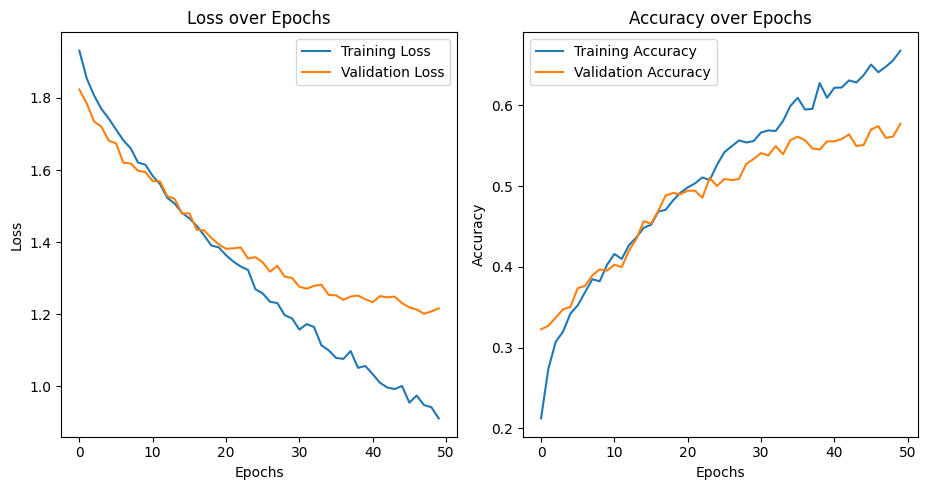

In [ ]:
import matplotlib.pyplot as plt

# Extract data from best history
loss = best_history.history['loss']
val_loss = best_history.history['val_loss']
accuracy = best_history.history['accuracy']
val_accuracy = best_history.history['val_accuracy']
lr = best_history.history['lr']

# Plotting Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 3, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
